# Vizualizace dat

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

Budeme pracovat s [iris](https://archive.ics.uci.edu/ml/datasets/Iris/) datasetem. Jde o velmi často využívaný dataset obsahující údaje o okvětních lístcích 3 druhů kosatců (*setosa*, *versicolor*, *virginica*). Data sesbíral v roce 1936 slavný statistik R. A. Fisher.
<img src="iris.jpg" width=400/>

Data netřeba stahovat, pandy je stáhnou přímo z internetu.

In [2]:
iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


O každém druhu kosatce máme 50 měření.

In [3]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Kategorická vs. numerická data

Vhodný způsob vizualizace vybíráme podle typu dat.

**Kategorická data**
* Ekvivalentně diskrétní, nominální.
* Nabývají konečně mnoha hodnot.
* Nedává smysl mezi sebou porovnávat hodnoty, sčítat je, ...
* Příklady: barva, rostlinný druh, telefonní číslo, adresa, typ podaného léku, ...

**Numerická data**
* Ekvivalentně spojitá, číselná.
* Mohou nabývat konečně i (formálně) nekonečně mnoha hodnot.
* Dává smysl mezi sebou porovnávat hodnoty a provádět s nimi matematické operace.
* Příklady: věk, výška, výše úvěru, počet připojení na server, ...

## 1. Histogram
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
* Vizualizace četností v jednotlivých přihrádkách.
* Pozor na vhodnou volbu počtu přihrádek.

Histogramy jednotlivých numerických proměnných.

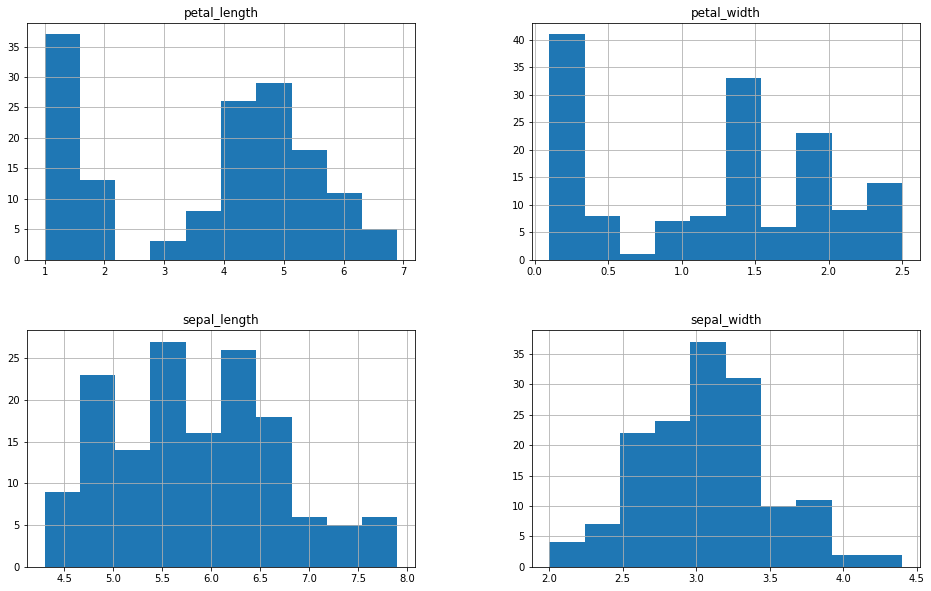

In [4]:
iris.hist(figsize=(16, 10));

Barevně odlišíme podle typu kosatce.

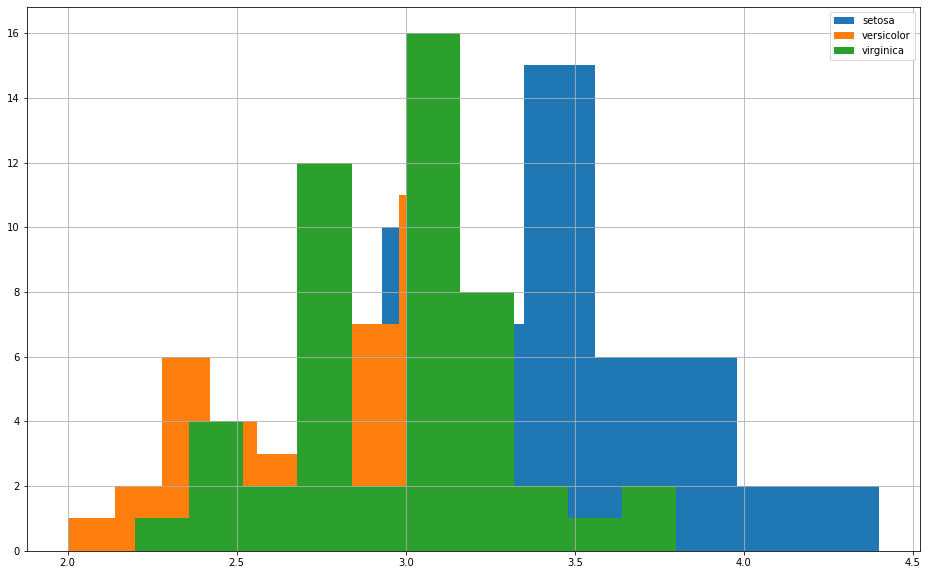

In [5]:
fig = plt.figure(figsize=(16, 10))
iris.loc[iris["species"] == "setosa", "sepal_width"].hist(label="setosa")
iris.loc[iris["species"] == "versicolor", "sepal_width"].hist(label="versicolor")
iris.loc[iris["species"] == "virginica", "sepal_width"].hist(label="virginica")
plt.legend();

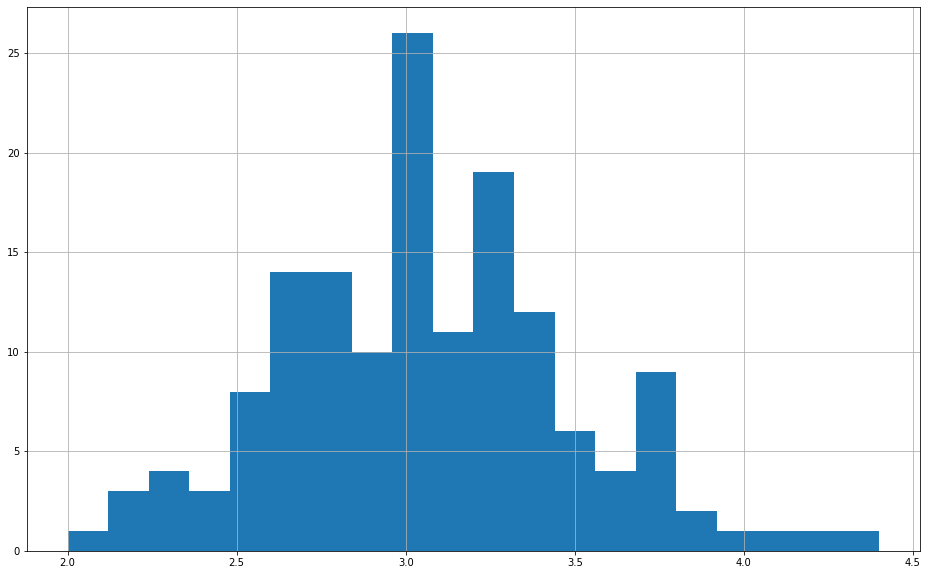

In [6]:
iris["sepal_width"].hist(bins=20, figsize=(16, 10));

## 2. Scatterplot
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html
* Slouží k vizualizaci vztahu 2 numerických proměnných.
* Pozor na nastavení velikosti obrázku -- obdélník může klamat.

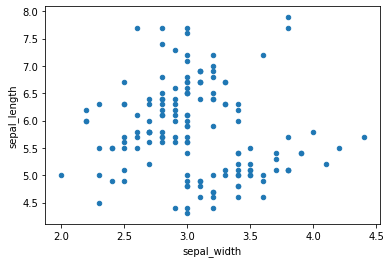

In [7]:
iris.plot("sepal_width", "sepal_length", kind="scatter")

In [8]:
species_num = iris["species"].replace({"setosa": 1, "versicolor": 2, "virginica": 3})

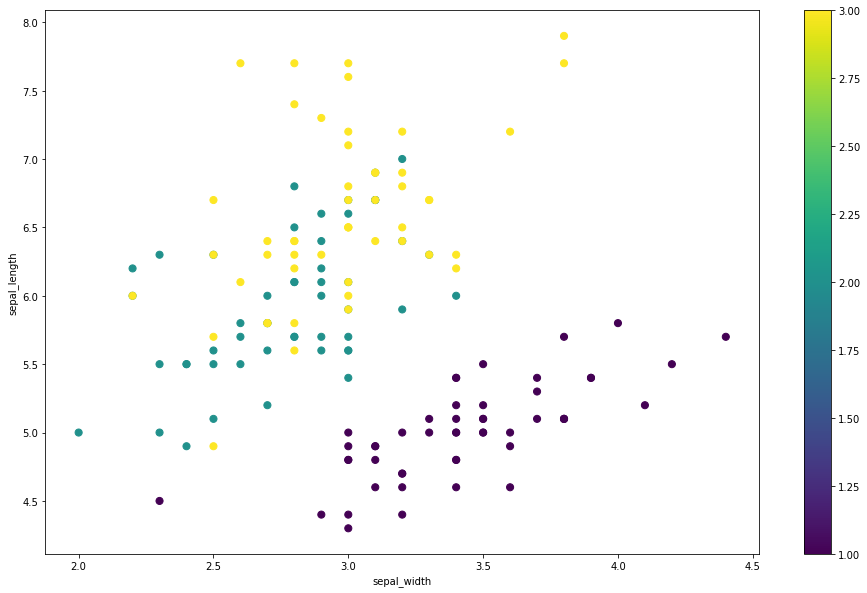

In [9]:
iris.plot.scatter(
    "sepal_width",
    "sepal_length",
    c=species_num,
    s=50,
    colormap="viridis",
    sharex=False,  # Jinak se nezobrazí popisky osy x, protože graf a colormap napravo mají stejnou x-osu.
    figsize=(16, 10)
);

## 3. Scatterplot matrix
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
* Máme-li proměnných víc, můžeme je všechny zakreslit do tzv. scatterplot matrix.
* Na diagonále jsou histogramy jednotlivých proměnných, mimo diagonálu scatterploty mezi každou dvojicí proměnných.
* Je dobré si něco takového vykreslit na začátku analýzy, kdy se teprve snažíme udělat obrázek o tom jaké proměnné vlastně máme.

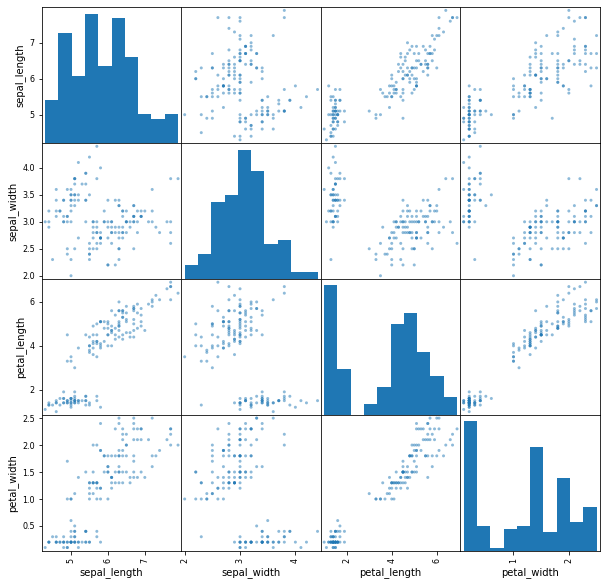

In [10]:
pd.plotting.scatter_matrix(iris, figsize=(10, 10));

Alternativně si můžeme místo histogramů nechat vykreslit odhady hustoty pravděpodobnosti -- vyhlazené histogramy.

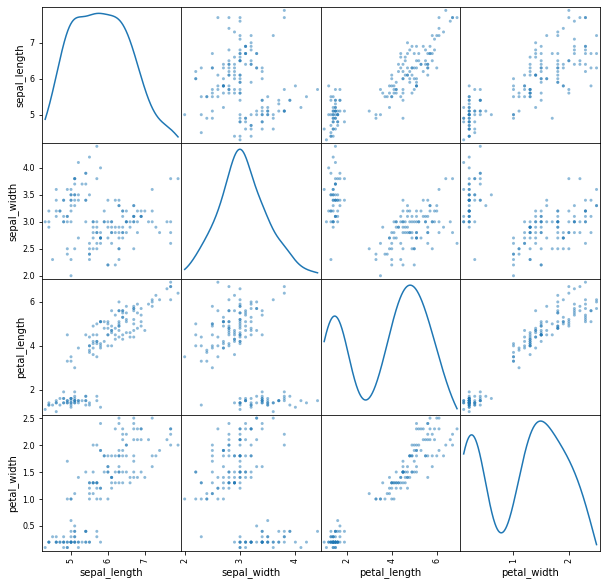

In [11]:
pd.plotting.scatter_matrix(iris, diagonal="kde", figsize=(10, 10));

## 4. Heatmap - korelační matice
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
* https://seaborn.pydata.org/generated/seaborn.heatmap.html
* Další způsob vizualizace vztahu mezi páry numerických proměnných.
* Dává podobnou informaci jako scatterplot matrix, ale kvantifikovanou.
* Pomocí `iris.corr()` napočítáme korelační matici -- tabulku, která má v každé buňce korelaci mezi 2 proměnnými.
* Následně ji vizualizujeme a jednotlivé buňky obarvíme podle korelace. Čím světlejší, tím vyšší korelace.

In [12]:
import seaborn as sns

In [13]:
corr = iris.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


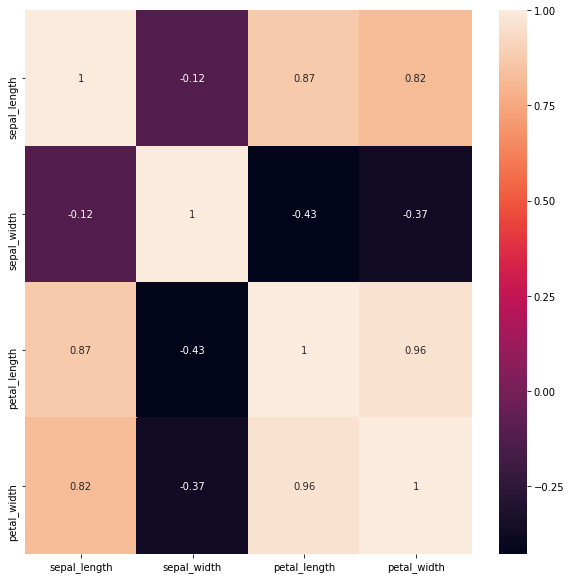

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax)

## 5. Boxplot
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
* Slouží k vizualizaci vztahu kategorické a numerické proměnné.
* Boxplot zobrazí pro každý druh kosatce krabici.
    * Vodorovná čára uvnitř krabice je medián.
    * Spodní a horní meze krabice jsou 25% a 75% kvartily.
    * Označíme IQR (interquartile range, mezikvartilové rozpětí) jako rozdíl 75% a 25% kvartilu.
    * Tykadla nad a pod krabicí jsou (obvykle) 1.5-násobek IQR.
    * Všechny body mimo tykadla jsou označené tečkou a chápeme je jako odlehlá pozorování (anomálie?).

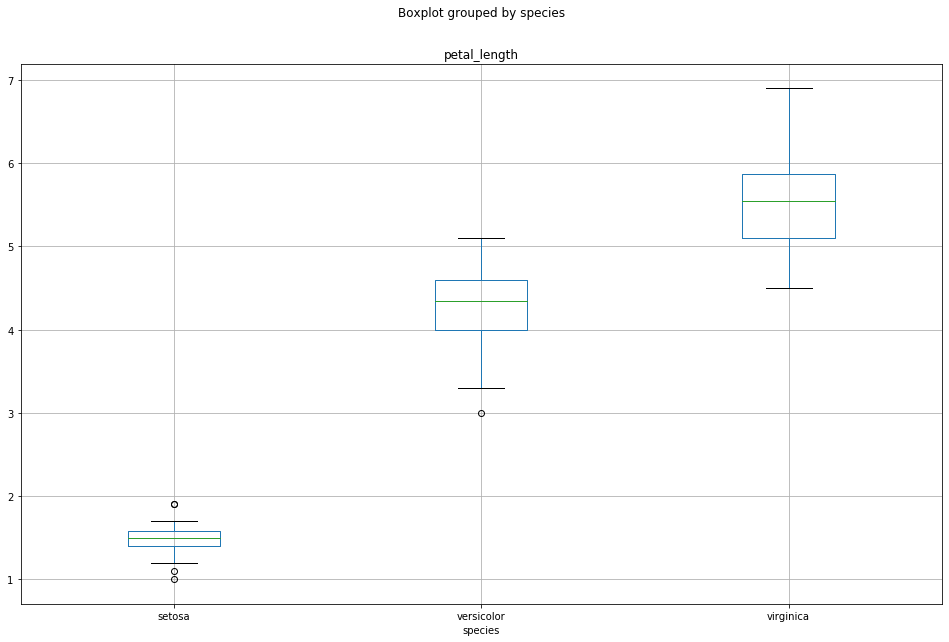

In [15]:
iris.boxplot("petal_length", by="species", figsize=(16, 10));

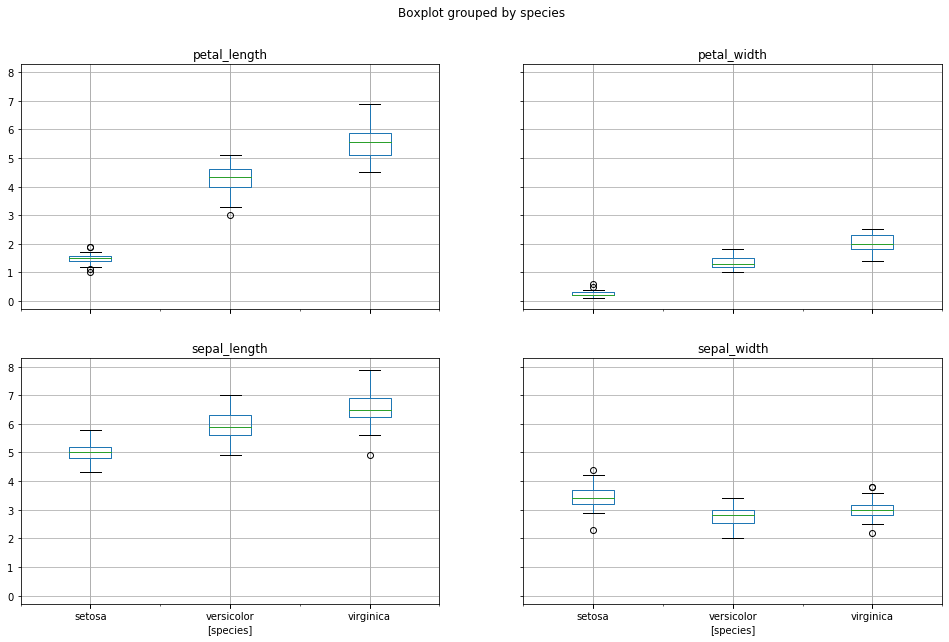

In [16]:
iris.boxplot(by="species", figsize=(16, 10));

## 6. Časové řady
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
* Poslední co si ukážeme je jak vykreslit časovou řadu. Pokud má Series index typu datetime, chápou ji pandy jako časovou řadu. Při vykreslení tedy x-osu anotují datumy.

Z kodim.cz ukradneme data o pohybech na účtu.

In [17]:
pohyby = [746, 52, -749, -63, 71, 958, 157, -1223, -1509, -285, -350, 728, -260, 809, -164, 243, -238, 233, -646, -82, -275, 179, 417, 149, 301, 957, -711, 376, 421, -15, -663]

In [18]:
import datetime as dt
data = [dt.date(2019, 3, d) for d in range(1, 32)]
ucet = pd.Series(pohyby, index=data)
ucet.head()

2019-03-01    746
2019-03-02     52
2019-03-03   -749
2019-03-04    -63
2019-03-05     71
dtype: int64

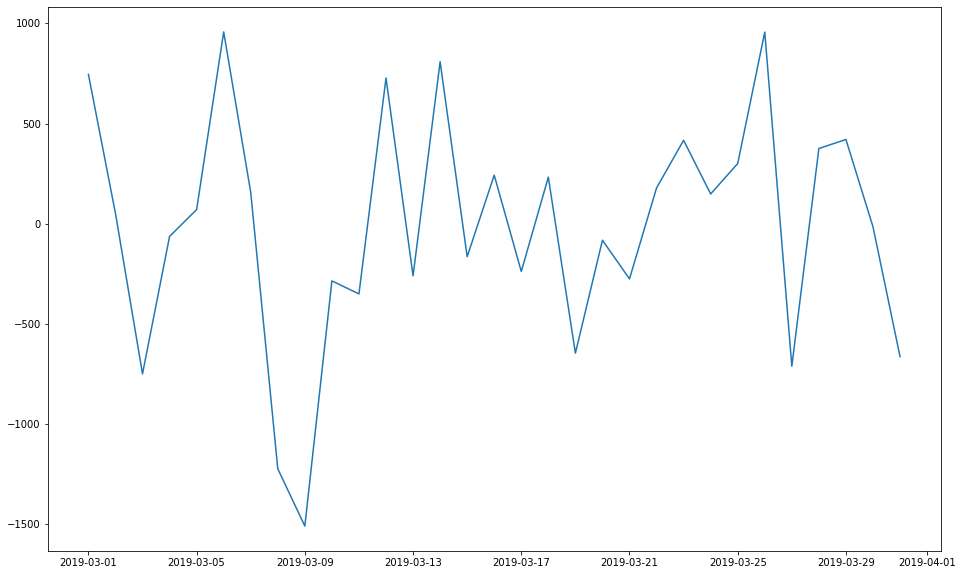

In [19]:
ucet.plot(figsize=(16, 10));

Pomocí kumulativní sumy spočítáme aktuální zůstatek na účtu.

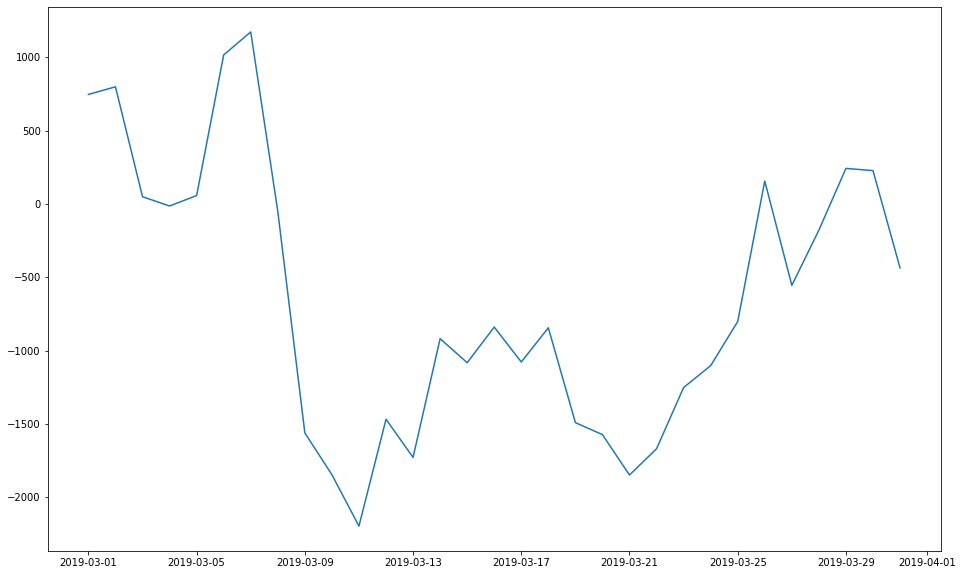

In [20]:
ucet.cumsum().plot(figsize=(16, 10));

Můžeme vykreslit barplot.

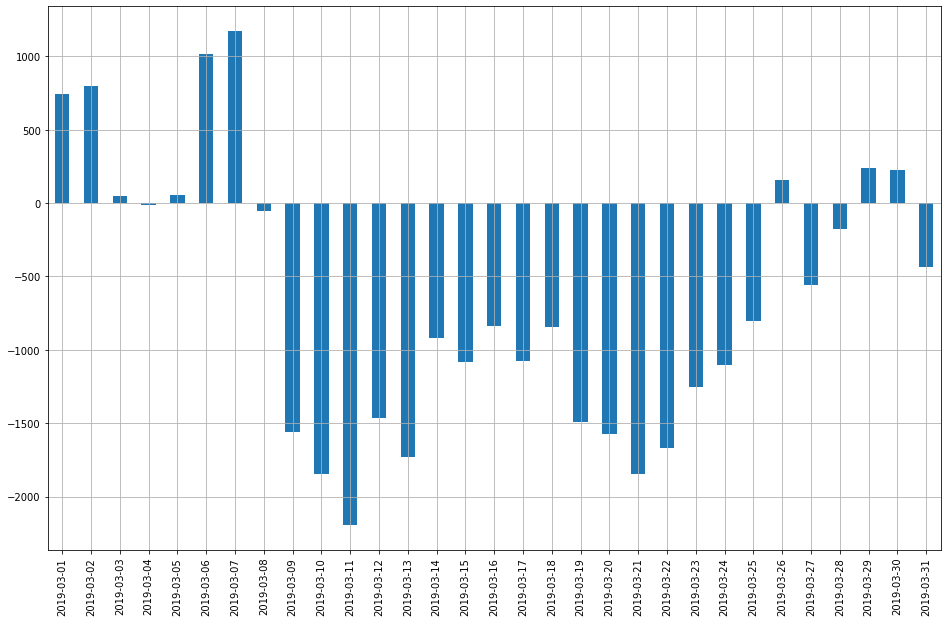

In [21]:
ucet.cumsum().plot(kind="bar", grid=True, figsize=(16, 10));

# Co dál?

* [Dive Into Python](https://diveintopython3.net/)
    * Velmi pěkná kniha o Pythonu, projde i mnohem pokročilejší věci než jsme tu stihli probrat.
    * K dispozici zdarma online, lze koupit v tištěné podobě.
    * Existuje i [český překlad](http://diveintopython3.py.cz/index.html).
* Jinak se ptejte co by vás zajímalo a zkusíme dát dohromady nějaké zdroje.